# Understanding factors for Churn in a Telecom Company

Case Study- Churn in Telecom's dataset

Source credit- https://www.kaggle.com/becksddf/churn-in-telecoms-dataset


## Context:

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The dataset contains the above information about the data.

Inspiration:
To explore this type of models and learn more about the subject as  the questions include exploratory data analysis.

## About the Data:

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

* Account Length: how long account has been active.
* VMail Message: Number of voice mail messages send by the customer.
* Day Mins: Time spent on day calls.
* Eve Mins: Time spent on evening calls.
* Night Mins: Time spent on night calls.
* Intl Mins: Time spent on international calls.
* Day Calls: Number of day calls by customers.
* Eve Calls: Number of evening calls by customers.
* Intl Calls: Number of international calls.
* Night Calls: Number of night calls by customer.
* Day Charge: Charges of Day Calls.
* Night Charge: Charges of Night Calls.
* Eve Charge: Charges of evening Calls.
* Intl Charge: Charges of international calls.
* VMail Plan: Voice mail plan taken by the customer or not.
* State: State in Area of study.
* Phone: Phone number of the customer.
* Area Code: Area Code of customer.
* Intl Plan: Does customer have international plan or not.
* CustServ Calls: Number of customer service calls by customer.
* Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)

##Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

## Import the data

In [8]:
ch = pd.read_csv("Churn.csv")

## How do we display the dataframe?

In [3]:
ch.head(10)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   
6    MA             121        510     355-9993                 no   
7    MO             147        415     329-9001                yes   
8    LA             117        408     335-4719                 no   
9    WV             141        415     330-8173                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   
5              no                      0              223.4               98   
6             yes                     24              218.2               88   
7              no                      0              157.0               79   
8              no                      0              184.5               97   
9             yes                     37              258.6               84   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   
5             37.98  ...                101             18.75   
6             37.09  ...                108             29.62   
7             26.69  ...                 94              8.76   
8             31.37  ...                 80             29.89   
9             43.96  ...                111             18.87   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   
5                203.9                118                9.18   
6                212.6                118                9.57   
7                211.8                 96                9.53   
8                215.8                 90                9.71   
9                326.4                 97               14.69   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   
6                 7.5                 7               2.03   
7                 7.1                 6               1.92   
8                 8.7                 4               2.35   
9                11.2                 5               3.02   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  
5                       0

In [12]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [39]:
shape = ch.shape
print(shape)

(3333, 21)


## Churn by State and Area Code

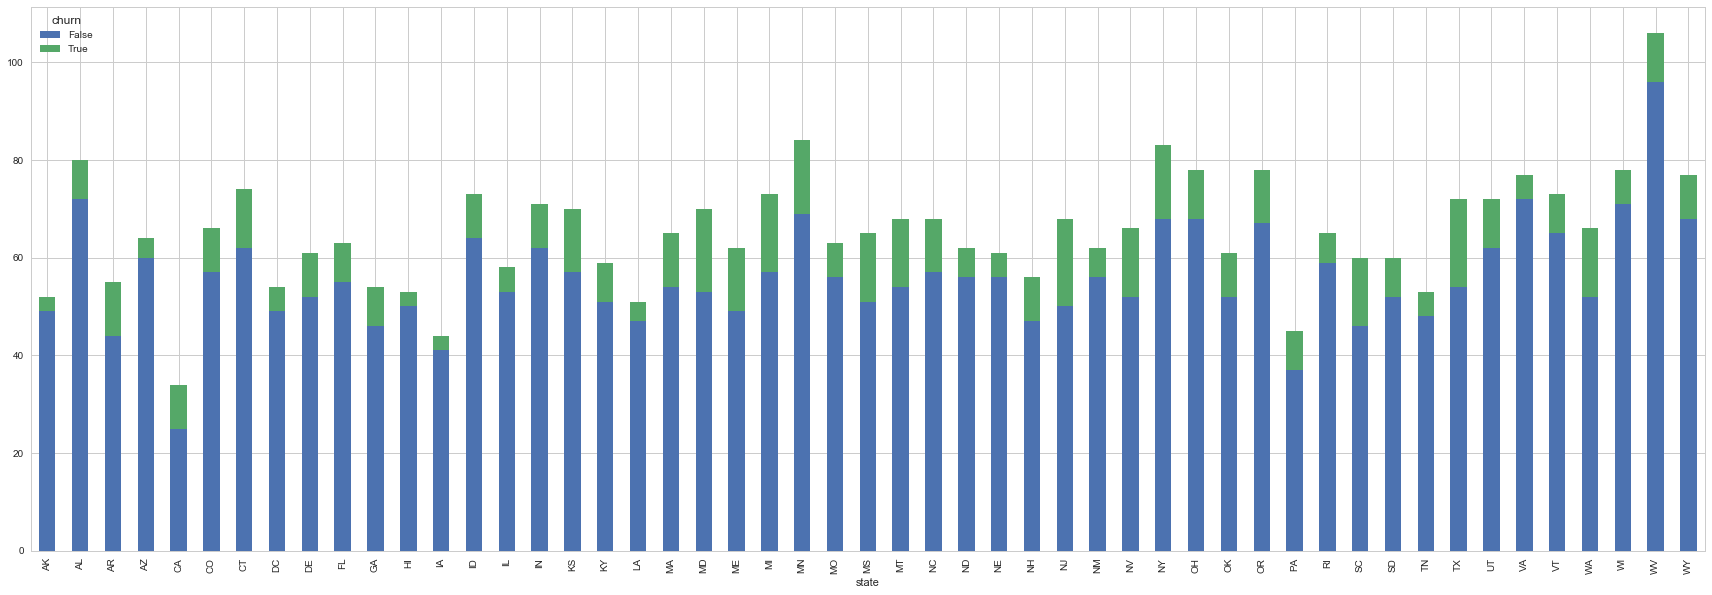

In [36]:
ch.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

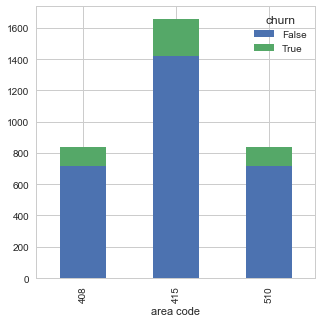

In [37]:
ch.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

## Finding out correlation among variables

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

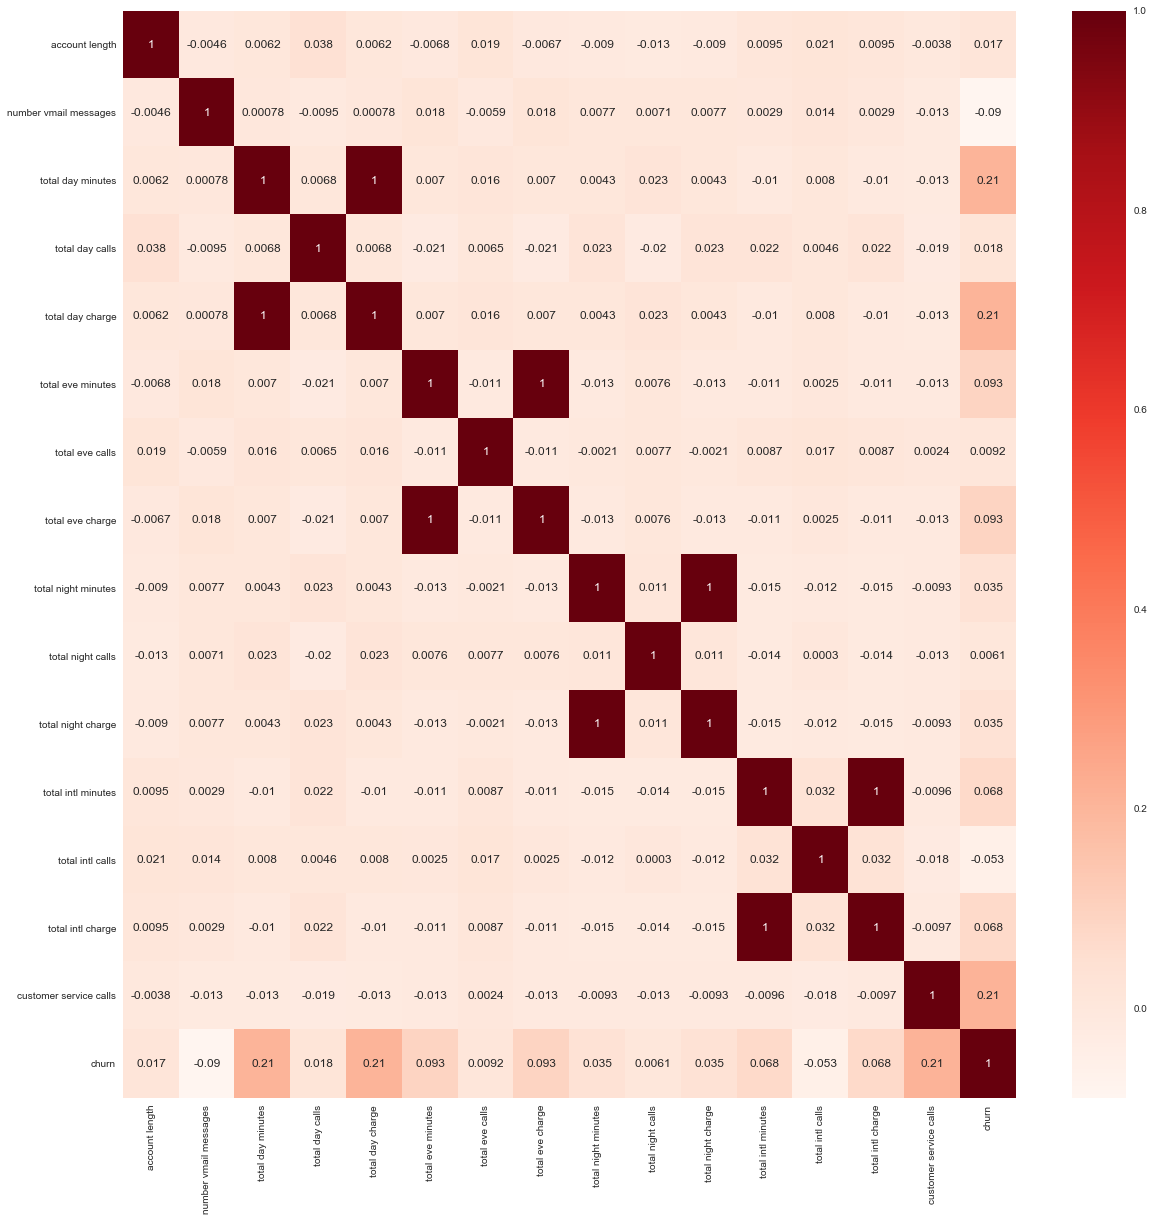

In [32]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = ch.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [34]:
#Correlation with output variable
cor_target = abs(cor["churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

total day minutes         0.205151
total day charge          0.205151
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

**As we can see, only the features "total day minutes", "total day charge" and "customer service calls" are correlated with the output variable "churn".**

- Hence we will drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. 
- If these variables are correlated with each other, then we need to keep only one of them and drop the rest. 
- So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [35]:
print(ch[["total day minutes","total day charge"]].corr())
print(ch[["total day charge","customer service calls"]].corr())

                   total day minutes  total day charge
total day minutes                1.0               1.0
total day charge                 1.0               1.0
                        total day charge  customer service calls
total day charge                1.000000               -0.013427
customer service calls         -0.013427                1.000000


It is quite clear from the above analysis that "total day minutes" and "total day charge" are highly corelated and during modelling either one of them shoulkd be dropped.

## Calculate Histogram for time spent on day calls by customers.

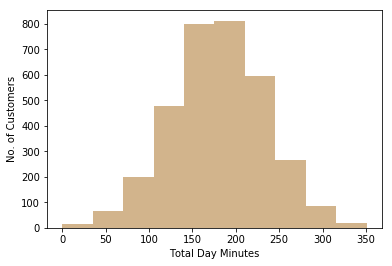

In [4]:
plt.hist(ch['total day minutes'], bins= 10, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

c:\users\akayal\devapps\python36-64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


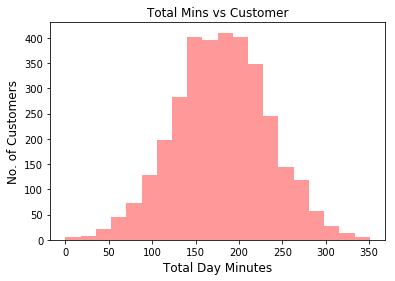

In [18]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
# df = sb.load_dataset('iris')
# sb.distplot(ch['Total Day Minutes'],kde=False)
sns.distplot(ch['total day minutes'],kde=False, color='red', bins=20)
plt.title('Total Mins vs Customer', fontsize=12)
plt.xlabel('Total Day Minutes', fontsize=12)
plt.ylabel('No. of Customers', fontsize=12)
plt.show()

## How do we categorize the churner and the non-churner for the time spent on day calls(total day minutes)?

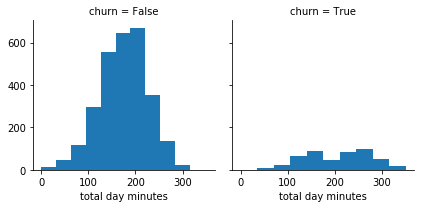

In [19]:
import seaborn as sns
g = sns.FacetGrid(ch, col="churn")
g.map(plt.hist, "total day minutes")

## Find the number of customers who did opt for voice mail plan

In [20]:
ch['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

## Produce a countplot for the above result

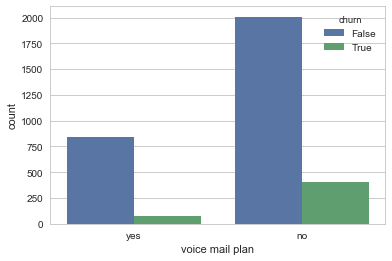

In [21]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="voice mail plan", hue= "churn", data=ch)

## Create a boxplot for a categorical variable(international plan) and continuous variable(area code).

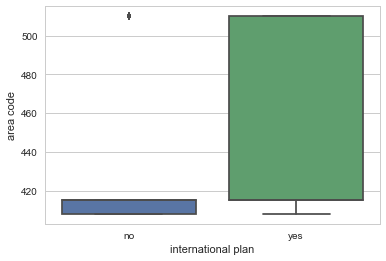

In [22]:
sns.boxplot(x = "international plan", y = "area code", data=ch)

## Create a crosstab for the area code to find the churner or non-churner.

In [23]:
pd.crosstab(ch['area code'],ch['voice mail plan'])

voice mail plan    no  yes
area code                 
408               618  220
415              1184  471
510               609  231

## How to pivot information using python for categorical values? Plot one.

In [24]:
pd.pivot_table(ch, index = ['area code','voice mail plan'], columns=['international plan'], aggfunc=len)

account length      churn       \
international plan                    no  yes    no  yes   
area code voice mail plan                                  
408       no                         567   51   567   51   
          yes                        200   20   200   20   
415       no                        1082  102  1082  102   
          yes                        423   48   423   48   
510       no                         531   78   531   78   
          yes                        207   24   207   24   

                          customer service calls      number vmail messages  \
international plan                            no  yes                    no   
area code voice mail plan                                                     
408       no                                 567   51                   567   
          yes                                200   20                   200   
415       no                                1082  102                  1082   
          yes                                423   48                   423   
510       no                                 531   78                   531   
          yes                                207   24                   207   

                               phone number       ...   total intl charge  \
international plan         yes           no  yes  ...                  no   
area code voice mail plan                         ...                       
408       no                51          567   51  ...               567.0   
          yes               20          200   20  ...               200.0   
415       no               102         1082  102  ...              1082.0   
          yes               48          423   48  ...               423.0   
510       no                78          531   78  ...               531.0   
          yes               24          207   24  ...               207.0   

                                 total intl minutes        total night calls  \
international plan           yes                 no    yes                no   
area code voice mail plan                                                      
408       no                51.0              567.0   51.0               567   
          yes               20.0              200.0   20.0               200   
415       no               102.0             1082.0  102.0              1082   
          yes               48.0              423.0   48.0               423   
510       no                78.0              531.0   78.0               531   
          yes               24.0              207.0   24.0               207   

                               total night charge        total night minutes  \
international plan         yes                 no    yes                  no   
area code voice mail plan                                                      
408       no                51              567.0   51.0               567.0   
          yes               20              200.0   20.0               200.0   
415       no               102             1082.0  102.0              1082.0   
          yes               48              423.0   48.0               423.0   
510       no                78              531.0   78.0               531.0   
          yes               24              207.0   24.0               207.0   

                                  
international plan           yes  
area code voice mail plan         
408       no                51.0  
          yes               20.0  
415       no               102.0  
          yes               48.0  
510       no                78.0  
          yes               24.0  

[6 rows x 36 columns]

## Calculate the total international minutes for all the combinations above. 

In [25]:
pd.pivot_table(ch, 'total intl minutes', index = ['area code','voice mail plan'], columns=['international plan'])

international plan                no        yes
area code voice mail plan                      
408       no               10.087302  10.821569
          yes              10.000500  10.720000
415       no               10.287061  10.605882
          yes              10.327896  11.193750
510       no               10.189642  10.167949
          yes               9.943961  10.600000

## Impact of International Plan on customer Churn

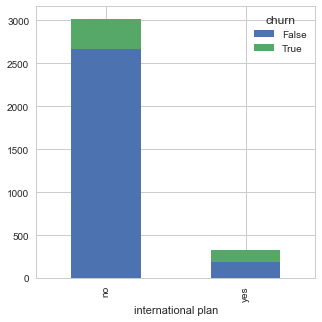

In [38]:
ch.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

## How do we understand the correlation between the variables or the columns within the dataframe. Plot one and analyze.

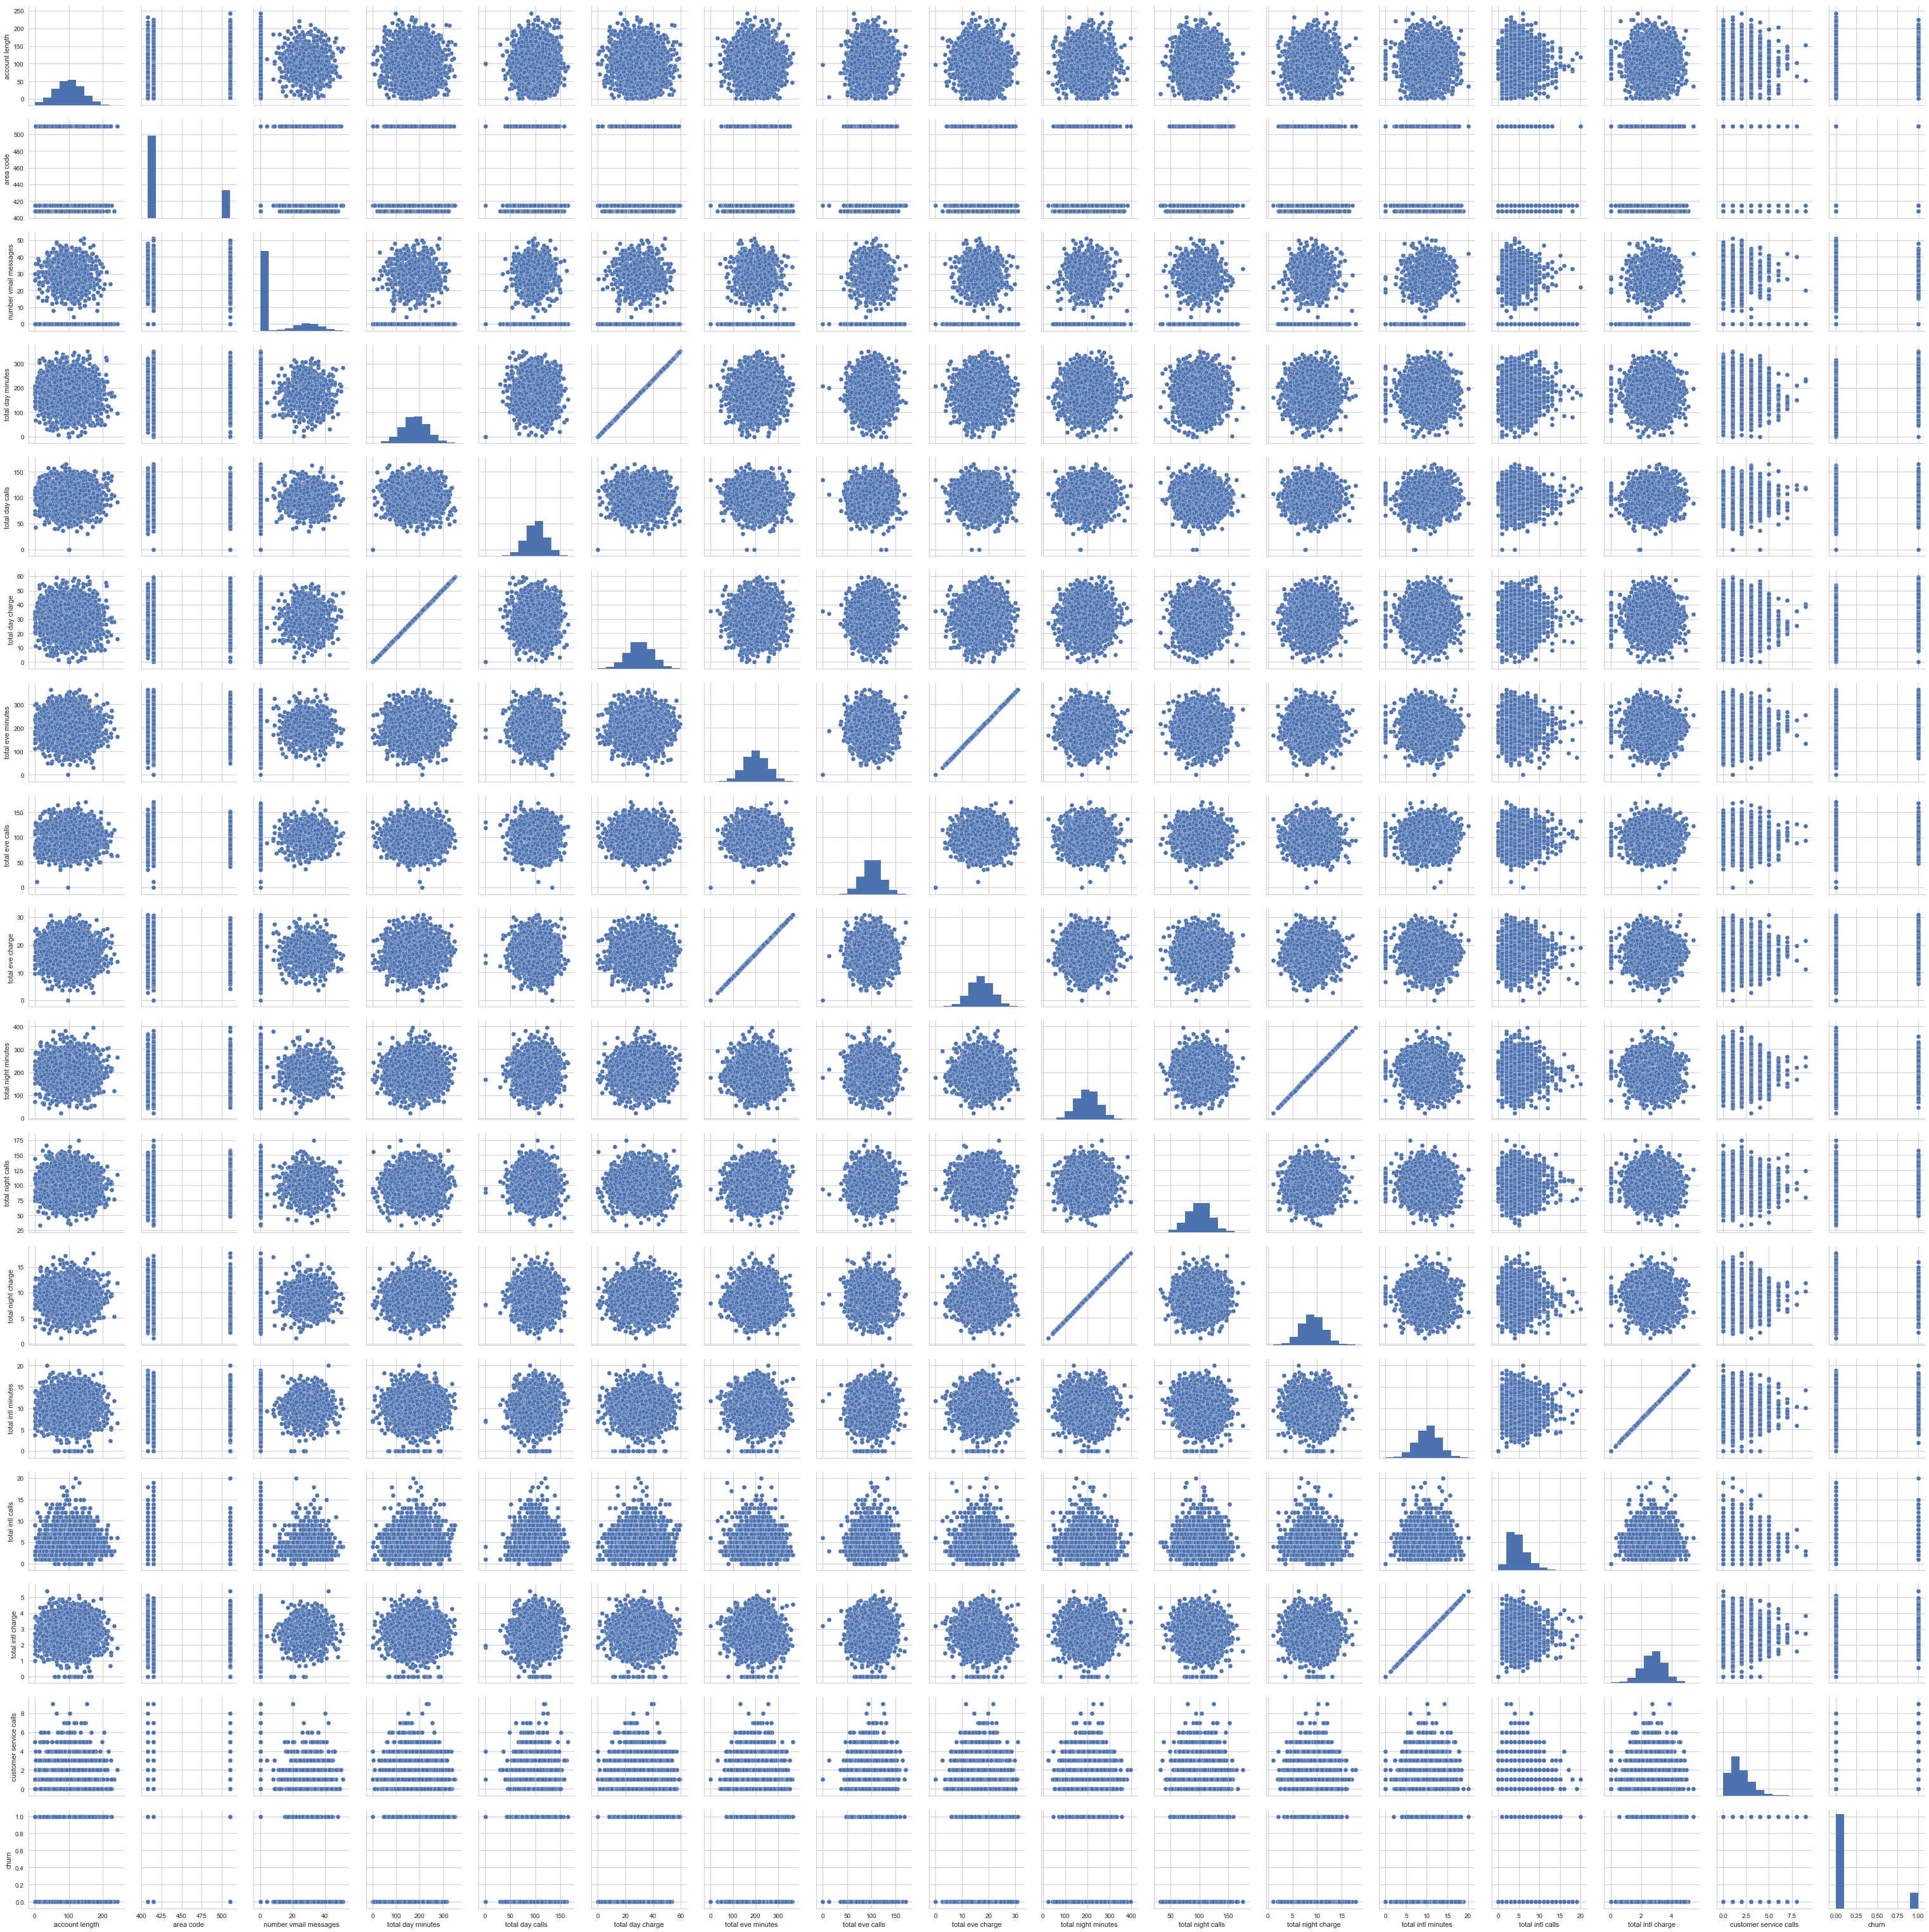

In [26]:
sns.pairplot(ch)

## Find Standard deviation of total night calls.

In [38]:
ch['total night calls'].std()

19.568609346058615

A low standard deviation indicates that the data points tend to be very close to the mean. A high standard deviation indicates that the data points are spread out over a large range of values.

## Plot a distplot for the above result to look at specifically total night calls.

c:\users\akayal\devapps\python36-64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


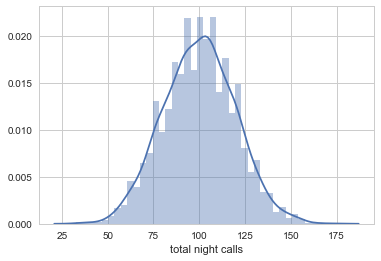

In [28]:
sns.distplot(ch['total night calls'])

## Plot a histogram to group it by churner or non-churner for the column area code.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019935E5E7B8>,
      dtype=object)

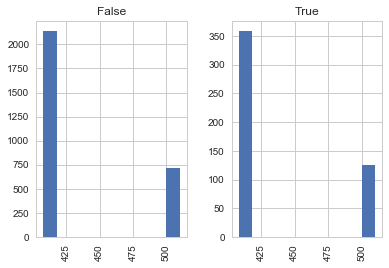

In [29]:
ch.hist(by='churn', column = 'area code')

## Calculate areawise churner or non-churner using countplot.

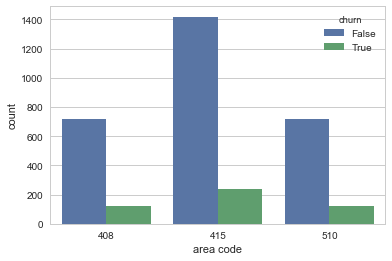

In [30]:
ch['area code']= ch['area code'].astype('category')
sns.countplot(x="area code", hue= "churn", data=ch)

# Understanding of descriptive statistics

Our aim is to understand following descriptive statistic approach.
- Peek At Your Data
- Dimensions of Your Data
- Data Types
- Class Distribution
- Data Summary
- Correlations
- Skewness

In [41]:
# View first 20 rows
diabs_data = pd.read_csv("diabetes.csv")
diabs_data.head(10)
# https://machinelearningmastery.com/understand-machine-learning-data-descriptive-statistics-python/

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

**Data**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Data Shape analysis is a key criteria and we dont want to process and take all the input variables into model.

- Too many rows and algorithms may take too long to train. 
- Too few and perhaps you do not have enough data to train the algorithms.
- Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.


In [42]:
shape = diabs_data.shape
shape

(768, 9)

Data Type analysis for dataframe is key for analysis and modelling. **Strings may need to be converted to floating point values or integers to represent categorical or ordinal values**.

In [45]:
print(diabs_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Descriptive Statistics

Descriptive statistics can give you great insight into the shape of each attribute. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute:
- Count
- Mean
- Standard Devaition
- Minimum Value
- 25th Percentile
- 50th Percentile (Median)
- 75th Percentile
- Maximum Value

In [46]:
print(diabs_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

###  Class Distribution 

In [49]:
class_counts = diabs_data.groupby('Outcome').size()
print(class_counts)

Outcome
0    500
1    268
dtype: int64


**We can see that there are nearly double the number of observations with class 0 (no onset of diabetes) than there are with class 1 (onset of diabetes)**.

### Correlation Between Attributes

The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset.

In [61]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
correlations = diabs_data.corr(method='pearson')
print(correlations)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

### Skew of Univariate Distributions

Skew refers to a distribution that is shifted or squashed in one direction or another.Many machine learning algorithms assume a Gaussian distribution.
The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [62]:
skew = diabs_data.skew()
print(skew)

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64


### Covariance Matrix Of Values

A large covariance can mean a strong relationship between variables.

The Correlation Coefficient has several advantages over covariance for determining strengths of relationships:

- Covariance can take on practically any number while a correlation is limited: -1 to +1.
- Because of it’s numerical limitations, correlation is more useful for determining how strong the relationship is between the two variables.
- Correlation does not have units. Covariance always has units
- Correlation isn’t affected by changes in the center (i.e. mean) or scale of the variables


In [63]:
diabs_data.cov()

Pregnancies   Glucose  BloodPressure  SkinThickness    Insulin      BMI  \
Pregnancies                    11.354    13.947          9.215         -4.390    -28.555    0.470   
Glucose                        13.947  1022.248         94.431         29.239   1220.936   55.727   
BloodPressure                   9.215    94.431        374.647         64.029    198.378   43.005   
SkinThickness                  -4.390    29.239         64.029        254.473    802.980   49.374   
Insulin                       -28.555  1220.936        198.378        802.980  13281.180  179.775   
BMI                             0.470    55.727         43.005         49.374    179.775   62.160   
DiabetesPedigreeFunction       -0.037     1.455          0.265          0.972      7.067    0.367   
Age                            21.571    99.083         54.523        -21.381    -57.143    3.360   
Outcome                         0.357     7.115          0.601          0.569      7.176    1.101   

                          DiabetesPedigreeFunction      Age  Outcome  
Pregnancies                                 -0.037   21.571    0.357  
Glucose                                      1.455   99.083    7.115  
BloodPressure                                0.265   54.523    0.601  
SkinThickness                                0.972  -21.381    0.569  
Insulin                                      7.067  -57.143    7.176  
BMI                                          0.367    3.360    1.101  
DiabetesPedigreeFunction                     0.110    0.131    0.027  
Age                                          0.131  138.303    1.337  
Outcome                                      0.027    1.337    0.227